In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Fraud.csv')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Count the occurrences of 0 (not fraud) and 1 (fraud)
print(df['isFraud'].value_counts())
# See it as a percentage
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


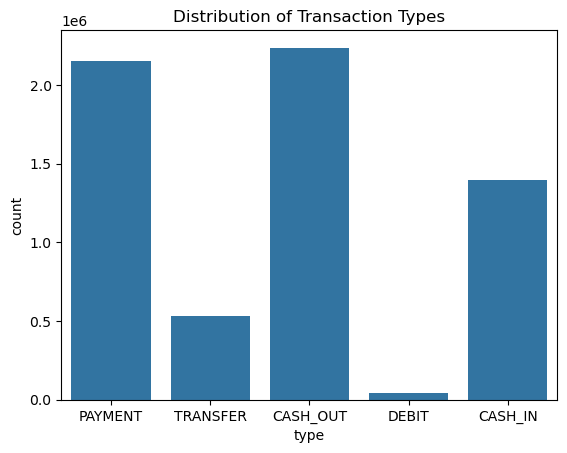

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.show()

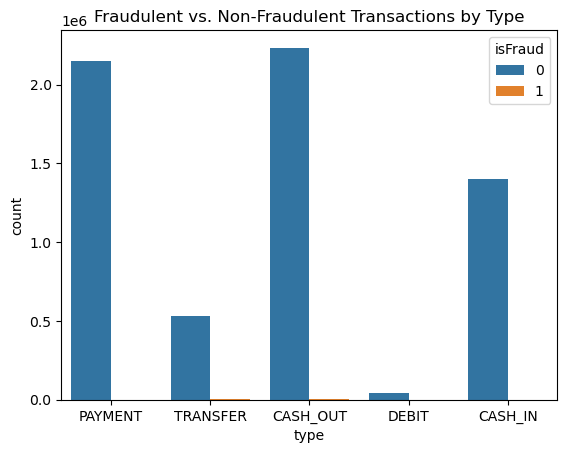

In [7]:
# Create a plot showing transaction type, but colored by whether it was fraud
sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Fraudulent vs. Non-Fraudulent Transactions by Type')
# Count the occurrences of 0 (not fraud) and 1 (fraud)
plt.show()

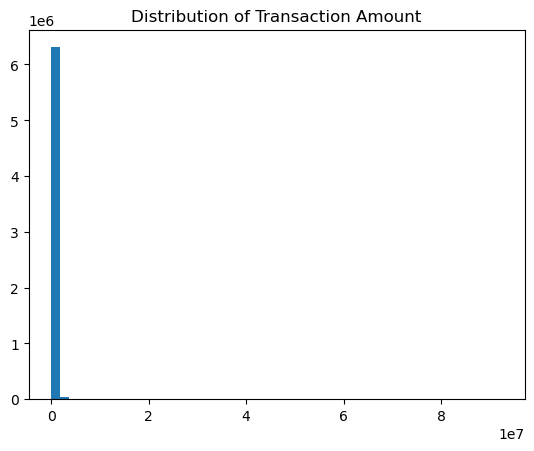

In [8]:
# Plot a histogram for the 'amount' column
plt.hist(df['amount'], bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

# DATA CLEANING PROCESS

In [9]:
# See a count of missing values for each column
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


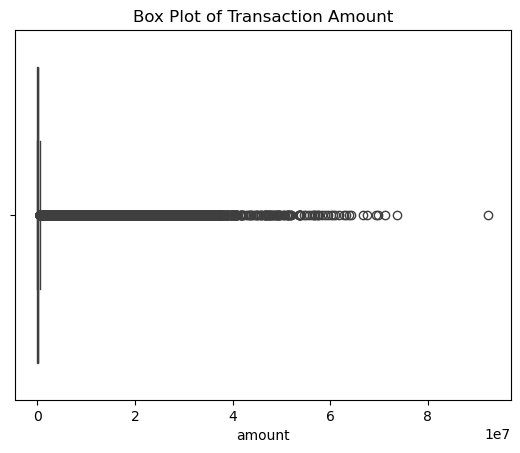

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in the 'amount' column
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amount')
plt.show()

In [12]:
import numpy as np
# We use np.log1p which is log(1+x) to handle any zero values
df['amount_log'] = np.log1p(df['amount'])

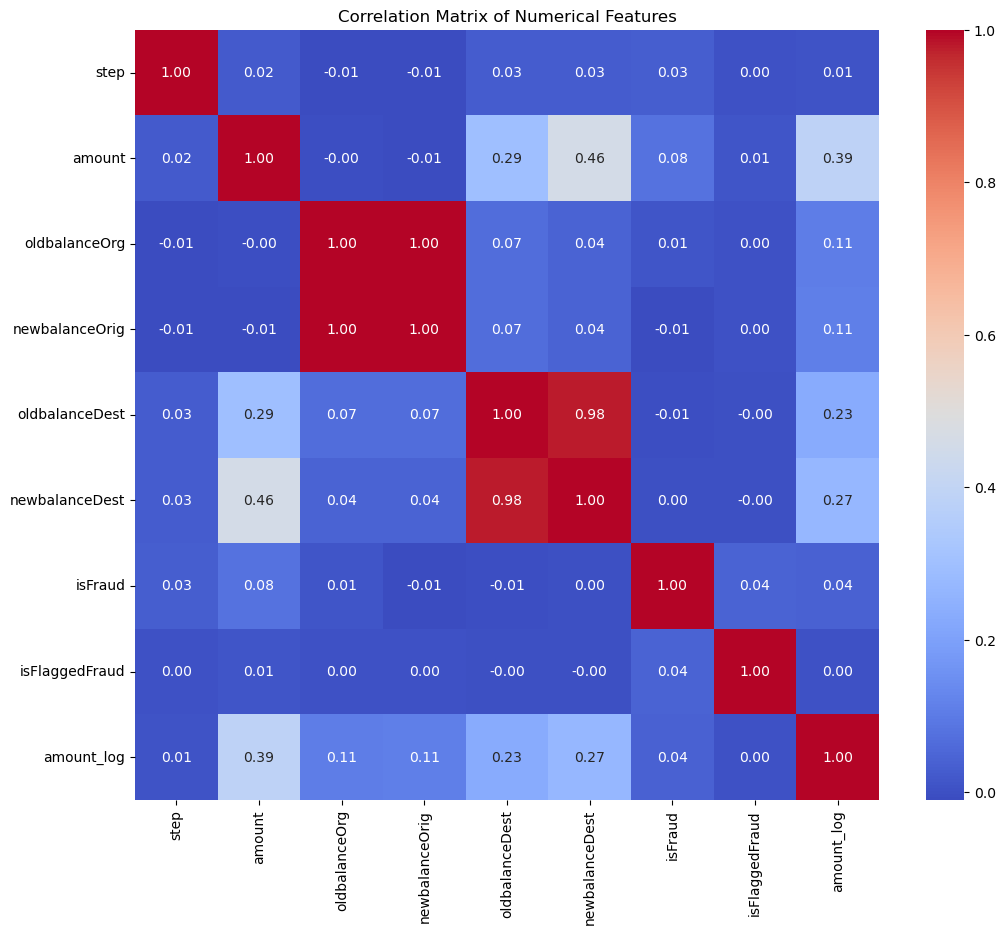

In [13]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [15]:
# Convert the 'type' column into numerical format
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)

In [16]:
# X contains all columns EXCEPT the one we want to predict ('isFraud')
X = df.drop('isFraud', axis=1)

# y contains ONLY the column we want to predict
y = df['isFraud']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 1.8 MB/s eta 0:00:31
    --------------------------------------- 1.3/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 2.1/56.8 MB 2.5 MB/s eta 0:00:23
   - -------------------------------------- 2.6/56.8 MB 2.6 MB/s eta 0:00:22
   -- ------------------------------------- 3.4/56.8 MB 2.8 MB/s eta 0:00:20
   --- ------------------------------------ 4.5/56.8 MB 3.0 MB/s eta 0:00:18
   --- ------------------------------------ 5.2/56.8 MB 3.2 MB/s eta 0:00:17
   ---- ----------------------------------- 5.8/56.8 MB 3.2 MB/s eta 0:00:16
   ---- ----------------------------------- 6.8/56.8 MB 3.2 MB/s eta 0:00:16
   ----- ---------------------------------- 7.9/56.8 MB 3.4 MB/s eta 0:00:15
   ------ ----------

In [22]:
import xgboost as xgb

# Initialize the XGBoost Classifier model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='aucpr')

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [23]:
# Use the trained model to predict on the test features
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

# Print a report showing the main classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.39      0.99      0.56      1643

    accuracy                           1.00   1272524
   macro avg       0.70      1.00      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



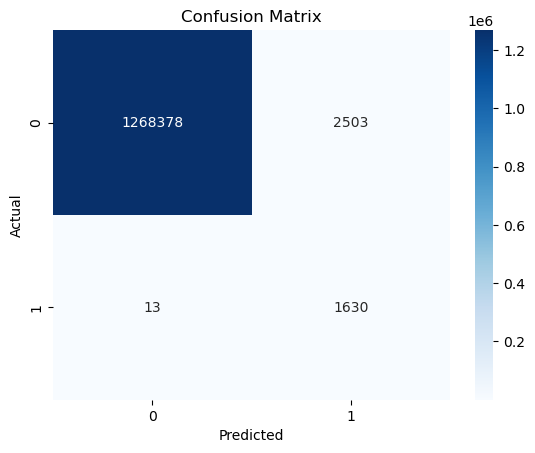

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Top-Left (True Negative): Correctly predicted "not fraud."

Bottom-Right (True Positive): Correctly predicted "fraud." (You want this high!)

Top-Right (False Positive): Incorrectly predicted "fraud" (a false alarm).

Bottom-Left (False Negative): Incorrectly predicted "not fraud" (a fraud that was missed). (You want this low!)

AUC: 0.9996


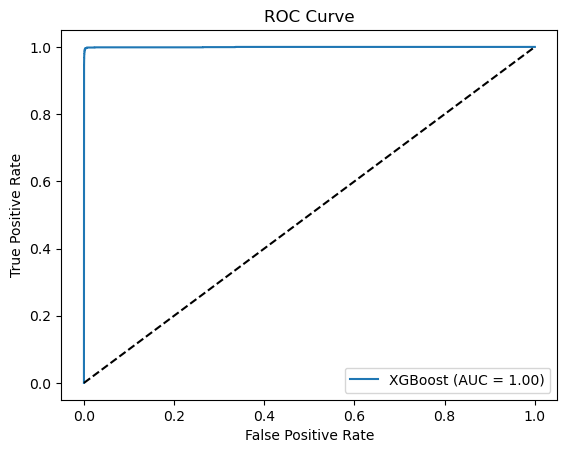

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.4f}')

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

A good model has a curve that goes far up and to the left. An AUC score close to 1.0 means your model is excellent at distinguishing between fraudulent and legitimate transactions.

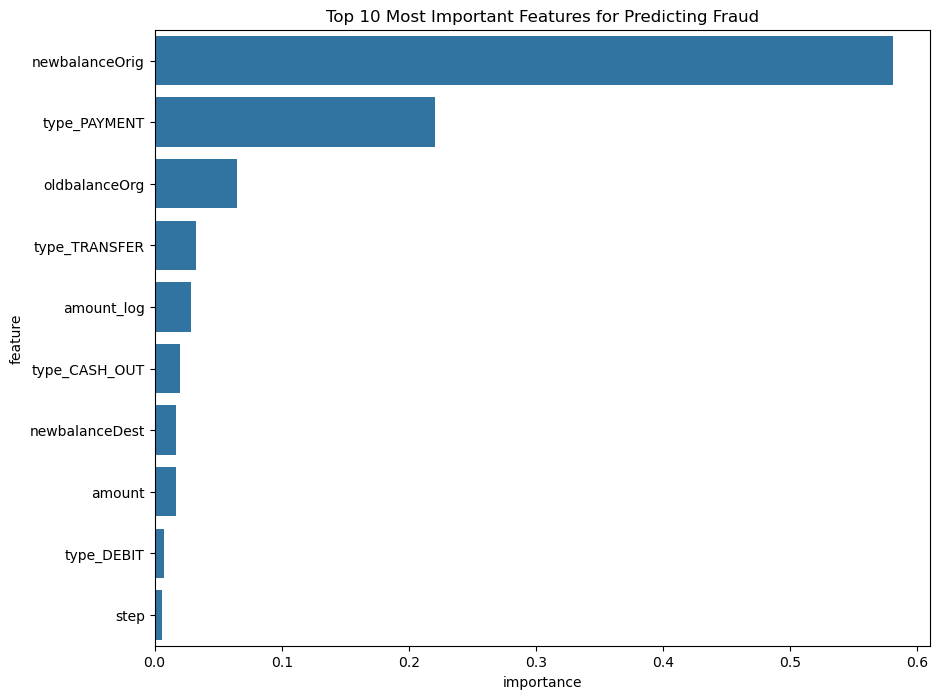

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Fraud')
plt.show()

"The key factors that predict fraudulent transactions, according to the model, are [list the top 3-5 features from your chart]. For instance, oldbalanceOrg, the transaction type (specifically TRANSFER and CASH_OUT), and the amount of the transaction are the strongest predictors.